In [24]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the data
data = pd.read_csv('Merged sensors+interpolated+Presence+Gradient+each room presence.csv', header=0, index_col='Datetime', parse_dates=['Datetime'])
data = data.dropna()

In [26]:
# Separate features and target variable
X = data.drop(columns=['Presence','Room 104','Room 203','Room 204'])
y = data['Presence']

In [27]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
Xcnn = X.reshape((X.shape[0], X.shape[1], 1))

In [29]:
# Prepare the category from the classification methods
y_cat = to_categorical(y, num_classes=int(y.max()+1))

y_validation_cat = np.argmax(y_cat, axis=1)

In [43]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_cat, test_size=0.5, random_state=42)
# split_index = int(len(X) * 0.5)
# X_train, X_validation = X[split_index:],X[-split_index:]
# y_train, y_validation = y_cat[split_index:],y_cat[-split_index:]

In [44]:
model2 = Sequential([
    Conv1D(12, 3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),

    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),

    Conv1D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),

    Flatten(),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    # Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(int(y.max() + 1), activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Charles\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Train the model
model2.fit(X_train, y_train, epochs=250, batch_size=64, validation_data=(X_valid, y_valid))
# model2 = tf.keras.models.load_model('Newmodel_depth1024_newDATA.keras')


# Evaluate the model
loss, accuracy = model2.evaluate(X_valid, y_valid)
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5783 - loss: 2.0937 - val_accuracy: 0.6989 - val_loss: 1.2479
Epoch 2/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7213 - loss: 1.2446 - val_accuracy: 0.7305 - val_loss: 0.9782
Epoch 3/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7231 - loss: 1.0917 - val_accuracy: 0.7329 - val_loss: 0.9163
Epoch 4/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7253 - loss: 1.0317 - val_accuracy: 0.7283 - val_loss: 0.9296
Epoch 5/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7225 - loss: 1.0219 - val_accuracy: 0.7334 - val_loss: 0.8550
Epoch 6/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7295 - loss: 0.9829 - val_accuracy: 0.7329 - val_loss: 0.8694
Epoch 7/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7299 - loss: 0.9636 - val_accuracy: 0.7327 - val_loss: 0.8798
Epoch 8/250
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7249 - loss: 0.9598 - val_accu

In [46]:
loaded_loss, loaded_accuracy = model2.evaluate(X, y_cat)
print(f'Loaded model validation accuracy: {loaded_accuracy:.4f}')
y_pred_model2 = model2.predict(X)
y_pred_model2_cat = np.argmax(y_pred_model2, axis=1)

929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7604 - loss: 0.7532
Loaded model validation accuracy: 0.7602
929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


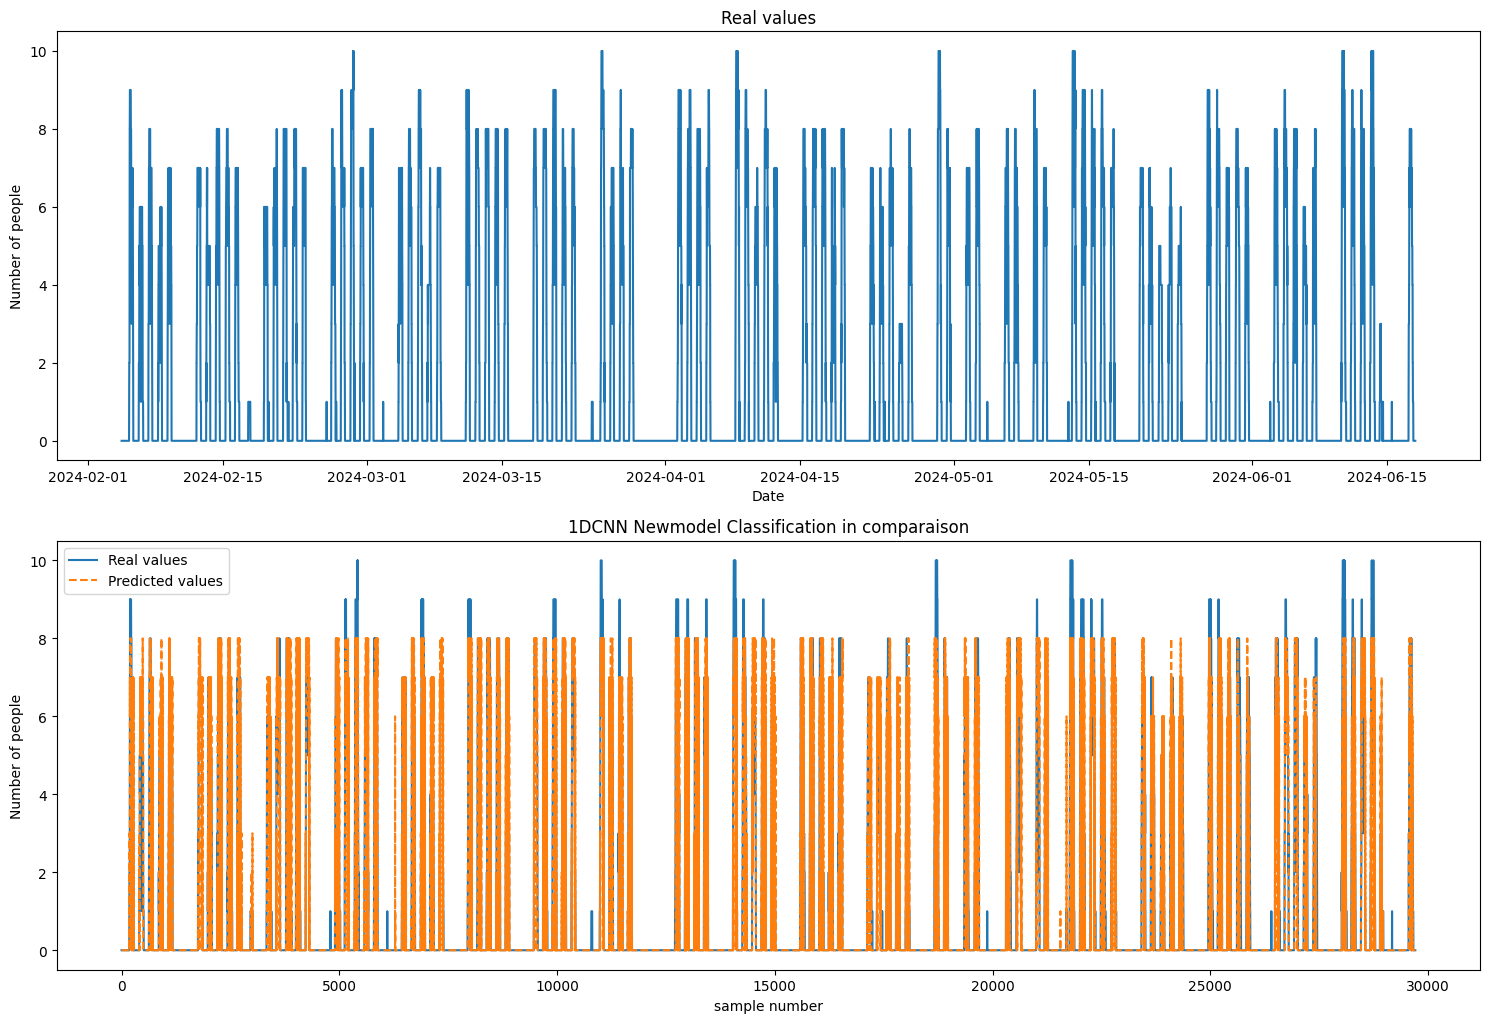

In [47]:
#plot figures:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(y)
plt.title('Real values')
plt.xlabel('Date')
plt.ylabel('Number of people')

plt.subplot(3, 1, 2)
sns.lineplot(data=y_validation_cat, label='Real values')
sns.lineplot(data=y_pred_model2_cat, label='Predicted values',linestyle='--')
plt.title('1DCNN Newmodel Classification in comparaison')
plt.xlabel('sample number')
plt.ylabel('Number of people')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
# Save the entire model to a keras file
model2.save('Newmodel_Half_randomnewDATA.keras')